## 1. Data Exploration and Understanding

### 1.1 Loading DataSet and Import our libraries

This section we load Sales_data.CSV and import libraries which we need

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load DataSet
df = pd.read_csv('sales_data.csv')

# Display a few rows of the Dataset
df.head()

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950


### 1.2 Pre-Analysis

Here, we're getting a quick overview of the dataset. We'll check its structure, get some basic statistics

In [2]:
# Get a summary of the dataset
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order Date        185950 non-null  object 
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Product_ean       185950 non-null  float64
 4   catégorie         185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Quantity Ordered  185950 non-null  int64  
 7   Price Each        185950 non-null  float64
 8   Cost price        185950 non-null  float64
 9   turnover          185950 non-null  float64
 10  margin            185950 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 15.6+ MB


Order Date          0
Order ID            0
Product             0
Product_ean         0
catégorie           0
Purchase Address    0
Quantity Ordered    0
Price Each          0
Cost price          0
turnover            0
margin              0
dtype: int64

In [3]:
# Descriptive statistics for numerical columns
df.describe()

,Order ID,Product_ean,Quantity Ordered,Price Each,Cost price,turnover,margin
count,185950.000000,1.859500e+05,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,5.509211e+12,1.124383,184.399735,69.668583,185.490917,115.289422
std,51512.737110,2.598403e+12,0.442793,332.731330,109.424191,332.919771,225.227190
min,141234.000000,1.000083e+12,1.000000,2.990000,1.495000,2.990000,1.495000
25%,185831.250000,3.254280e+12,1.000000,11.950000,5.975000,11.950000,5.975000
50%,230367.500000,5.511235e+12,1.000000,14.950000,7.475000,14.950000,7.475000
75%,275035.750000,7.765195e+12,1.000000,150.000000,97.500000,150.000000,52.500000
max,319670.000000,9.999983e+12,9.000000,1700.000000,561.000000,3400.000000,2278.000000


# 2. Data Preprocessing

#### 2.1 Update Data

First of all change the columns stucture. Second, convert the 'order_date' to datetime format. Third, create some new columns by dividing the date. Forth, extract the states from address

In [4]:
# Changing the column's name
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')

# Convert 'Order Date' to datetime format and sorting the date
df['order_date'] = pd.to_datetime(df['order_date'])
df.sort_values('order_date', inplace=True)

# Dividing 'Order Date' to Year, Month, Day, Hour
df.insert(1, 'year', df['order_date'].dt.year)
df.insert(2, 'month', df['order_date'].dt.month)
df.insert(3, 'day', df['order_date'].dt.day)
df.insert(4, 'hour', df['order_date'].dt.hour)

# Take 'State' from 'purchase_address'
df['states'] = df['purchase_address'].str.split(',').str[1]

Cleaning:
1 - 'order_data' because we divide it to small goups of date. 2 - 'order_id' is a nonsense column. 3 - 'purchase_address' because we extract 'states' from it. 4 - 'product_ean' is an extra column

In [5]:
# Removing some useless columns to clean our Data
df.drop(columns=['order_date', 'order_id', 'purchase_address', 'product_ean'], inplace=True)
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)

In [10]:
# Check out all value_counts of the columns
for column in df.columns:
    print(f'Value counts for column ({column}) is: ')
    print(df[column].value_counts())
    print('*' * 30)

Value counts for column (year) is: 
2019    185916
2020        34
Name: year, dtype: int64
******************************
Value counts for column (month) is: 
12    24984
10    20282
4     18279
11    17573
5     16566
3     15153
7     14293
6     13554
2     11975
8     11961
9     11621
1      9709
Name: month, dtype: int64
******************************
Value counts for column (day) is: 
13    6306
10    6249
2     6197
19    6194
17    6177
26    6158
24    6150
20    6148
18    6146
14    6129
27    6117
16    6116
9     6114
15    6114
22    6110
28    6103
12    6093
21    6090
6     6088
8     6073
11    6068
4     6066
25    6064
1     6051
23    6049
7     6033
5     6020
3     5819
29    5720
30    5633
31    3555
Name: day, dtype: int64
******************************
Value counts for column (hour) is: 
19    12905
12    12587
11    12411
18    12280
20    12228
13    12129
14    10984
10    10944
21    10921
17    10899
16    10384
15    10175
22     8822
9      8748
23   

## 3. Visualization

### Now, it's the time to check out some charts

In this section we compare dates to figure out that which time of year is more important.  

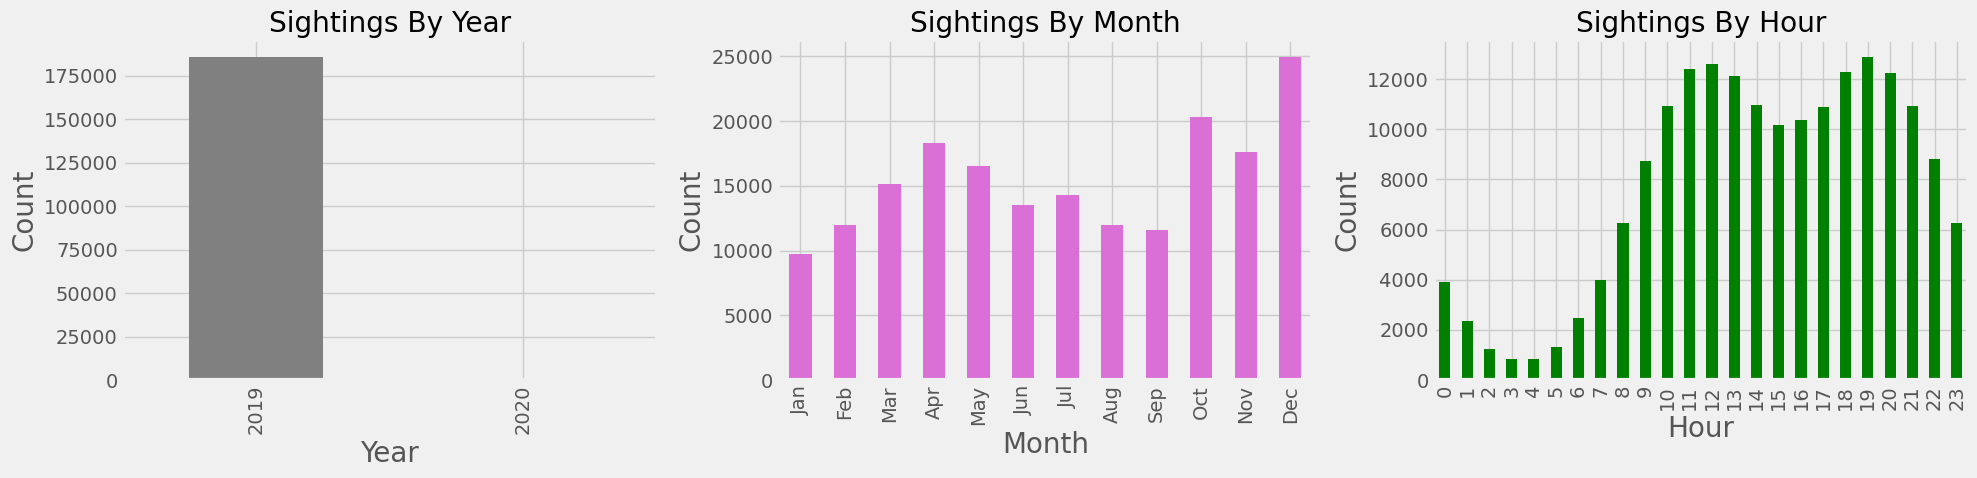

In [23]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
plt.style.use('fivethirtyeight')

# Plotting Sighting By Year
df['year'].value_counts().sort_index().plot(kind='bar', ax=axs[0], color='gray')
axs[0].set_title('Sightings By Year')
axs[0].set_xlabel('Year', fontsize=20)
axs[0].set_ylabel('Count', fontsize=20)

# Plotting Sighting By Month
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
month = df['month'].value_counts().sort_index()
month.index = month.index.map(month_mapping)
month.plot(kind='bar', ax=axs[1], color='orchid')
axs[1].set_title('Sightings By Month')
axs[1].set_xlabel('Month', fontsize=20)
axs[1].set_ylabel('Count', fontsize=20)

# Plotting Sighting By Hour
df['hour'].value_counts().sort_index().plot(kind='bar', ax=axs[2], color='green')
axs[2].set_title('Sightings By Hour')
axs[2].set_xlabel('Hour', fontsize=20)
axs[2].set_ylabel('Count', fontsize=20)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

It's realy important to know which product has more benefit and request

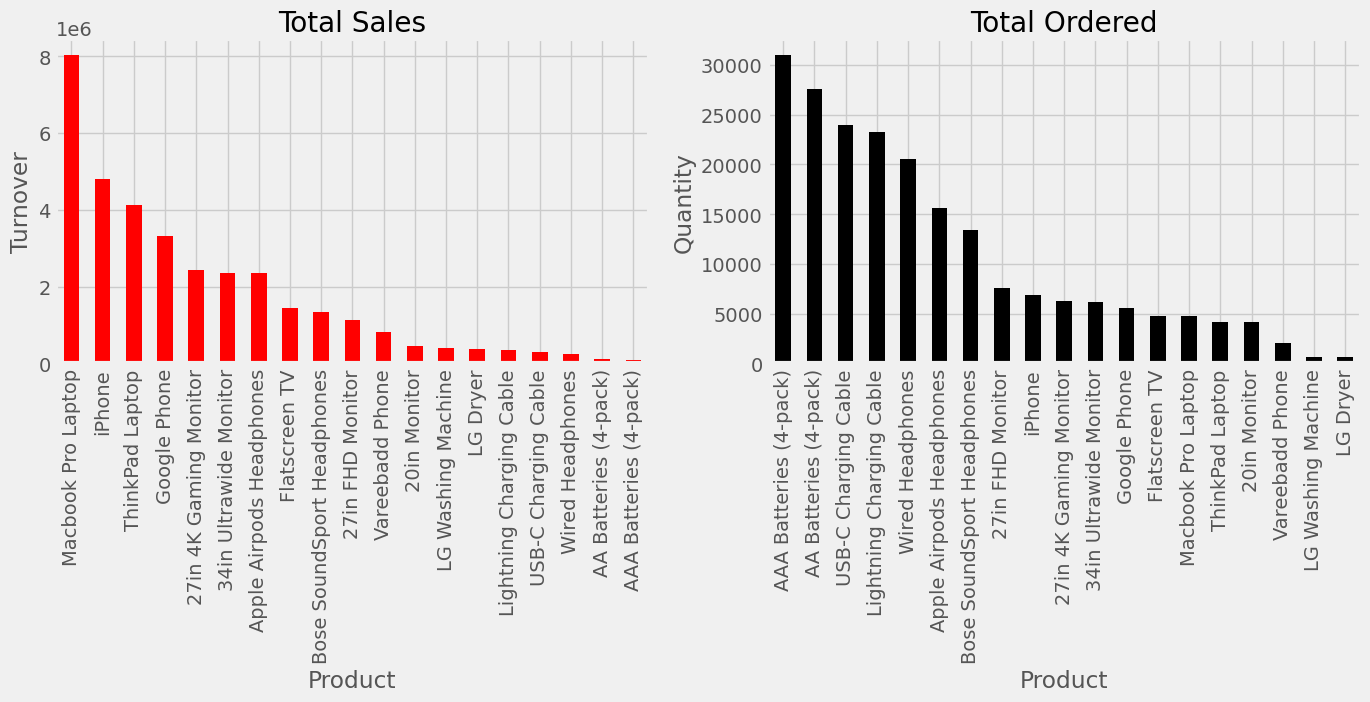

In [15]:
# Create subplot
plt.figure(figsize=(15, 4))

# First subplot: Total Sales
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
df.groupby('product')['turnover'].sum().sort_values(ascending=False).plot(kind='bar', color='red')
plt.title('Total Sales')
plt.xlabel('Product')
plt.ylabel('Turnover')

# Second subplot: Quantity Ordered
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
df.groupby('product')['quantity_ordered'].sum().sort_values(ascending=False).plot(kind='bar', color='black')
plt.title('Total Ordered')
plt.xlabel('Product')
plt.ylabel('Quantity')

# Show the plot
plt.show()

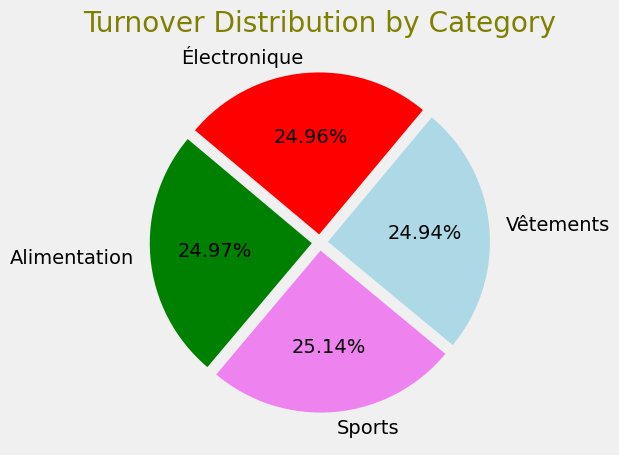

In [16]:
plt.figure(figsize=(8, 5))
colors = ["green", "violet", "lightblue", 'red']
df.groupby('catégorie')['turnover'].sum().plot(kind='pie', autopct='%.2f%%', colors=colors, startangle=140, explode=(0.05, 0.05, 0.05, 0.05))
plt.ylabel('')
plt.title('Turnover Distribution by Category', color = 'olive')
plt.show()

Aggregating data on a monthly basis helps in understanding monthly sales trends and patterns.

In [24]:
monthly_sales_data = df.groupby(['year', 'month']).agg({'price_each': 'sum', 'quantity_ordered': 'sum'}).reset_index()


A heatmap offers a graphical depiction of sales on a monthly basis throughout multiple years, aiding in the recognition of patterns and trends.

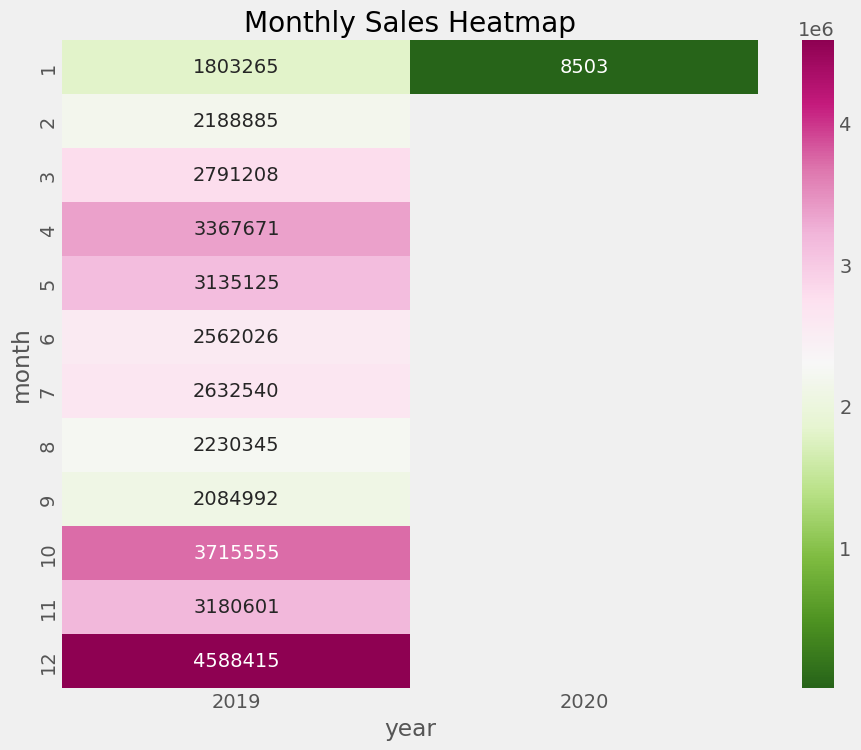

In [27]:
# Pivot the data to get months on one axis and years on another axis
heatmap_data = monthly_sales_data.pivot("month", "year", "price_each")

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap="PiYG_r", annot=True, fmt=".0f")
plt.title('Monthly Sales Heatmap')
plt.show()

## 4. Insights


###### Based on our analysis, here are some insights and recommendations:

#### 1) Trend:
During the months of April, October, and especially December, significant discounts are notably observed.
#### 2) Quantity and Benefit:
While there are certain products that are commonly available but not priced very high, concentrating on our profitable products during the discount periods could yield greater benefits.
